In [1]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

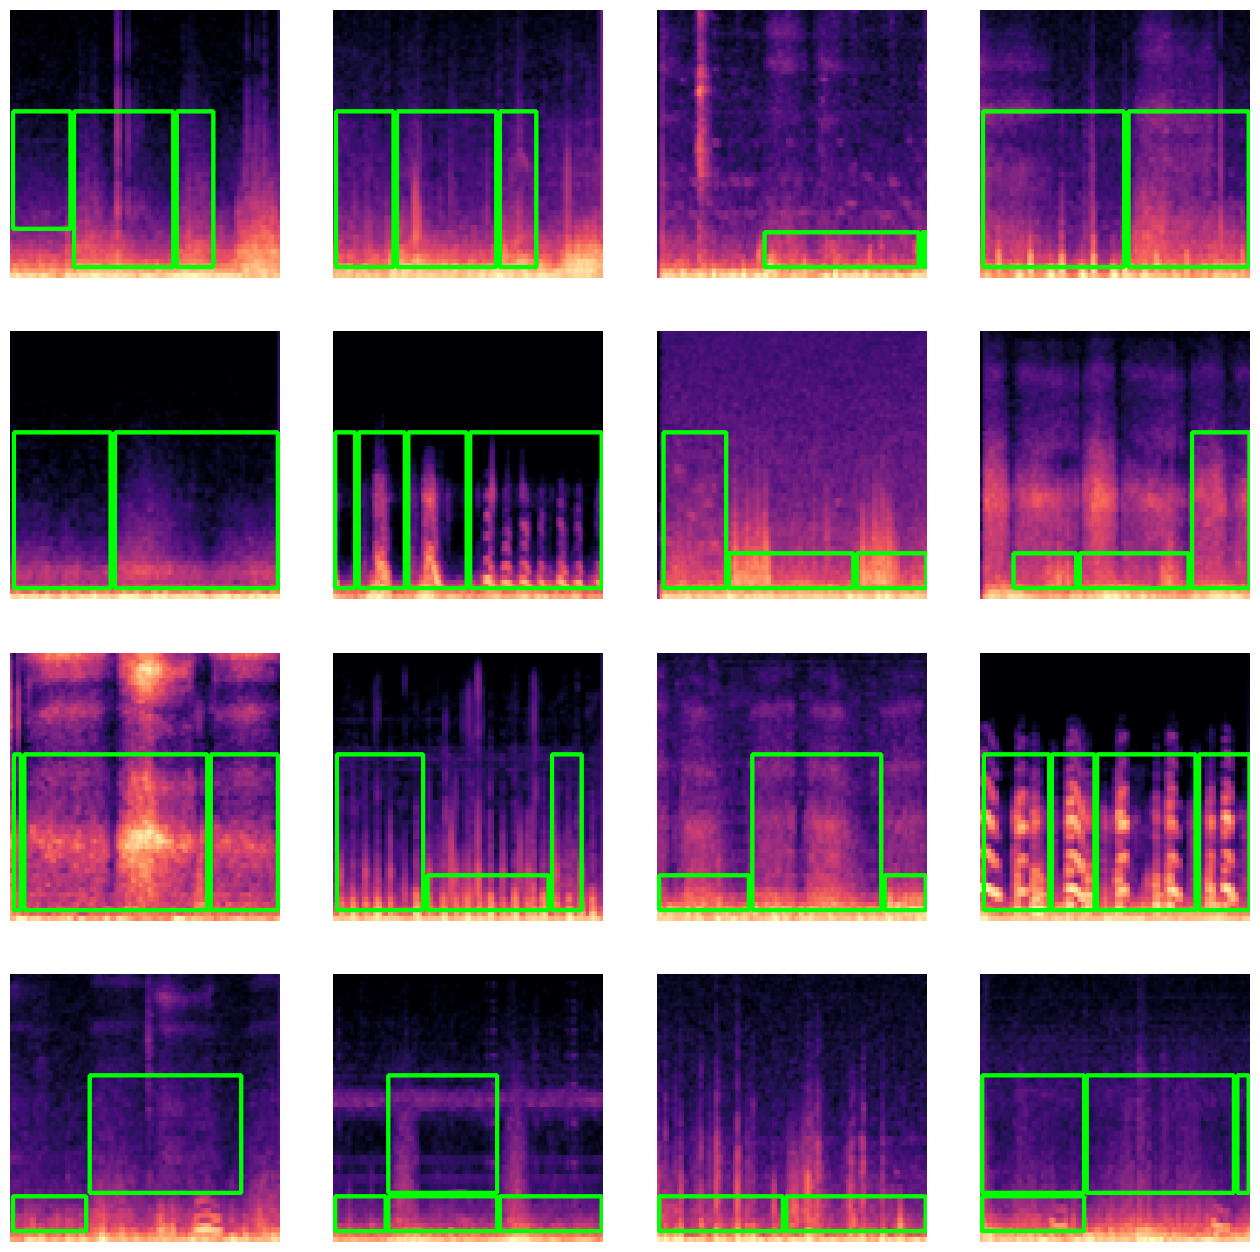

In [2]:
# Define the paths to the images and labels directories
train_images = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/train/images"
train_labels = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/train/labels"

test_images = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/test/images"
test_labels = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/test/labels"

val_images = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/val/images"
val_labels = "/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/val/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [4]:
#Image Metadata

# Load an image using OpenCV
image = cv2.imread("/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/test/images/174_1p3_Pr_mc_AKGC417L_2_aug.png")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

[ WARN:0@16.868] global loadsave.cpp:248 findDecoder imread_('/home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/test/images/174_1p3_Pr_mc_AKGC417L_2_aug.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
#Model Training

# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver2/data_augx.yaml',
            epochs = 50,
            imgsz = 640,
            seed = 42,
            batch = 8,
            workers = 4)

New https://pypi.org/project/ultralytics/8.1.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.40 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22491MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/sogaksa123/AIFFEL_THON/model/Yolov9_ver2/data_augx.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

train: Scanning /home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/train/labels... 2083 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2083/2083 [00:01<00:00, 1443.26it/s]

train: New cache created: /home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/val/labels... 596 images, 0 backgrounds, 0 corrupt: 100%|██████████| 596/596 [00:00<00:00, 1164.19it/s]

val: New cache created: /home/sogaksa123/AIFFEL_THON/data/dataset2/data_rec/Training_augx/val/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.24G      1.769      2.637      1.961         16        640: 100%|██████████| 261/261 [01:39<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.45it/s]

                   all        596       1868    0.00899      0.248    0.00927    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.51G      1.547      2.369      1.781         22        640: 100%|██████████| 261/261 [01:36<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all        596       1868     0.0466      0.476     0.0438     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       8.5G      1.354      2.221      1.631         17        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.194      0.449      0.155     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.51G      1.279      2.168      1.575         21        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.159      0.493      0.165      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       8.5G      1.209       2.09      1.527         26        640: 100%|██████████| 261/261 [01:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.153      0.411      0.172     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.49G      1.143      2.039       1.46         21        640: 100%|██████████| 261/261 [01:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.179       0.41      0.192     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.51G      1.077      1.993      1.428         27        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.201      0.418      0.209      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.49G      1.064      1.975      1.418         22        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.217      0.513      0.232      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.51G       1.01      1.927      1.371         11        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.186      0.522      0.215      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.51G      1.023      1.943      1.386         21        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.203      0.529      0.216       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.5G     0.9809      1.902      1.361         15        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868      0.196      0.507      0.197      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.51G     0.9456      1.876      1.338         23        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]

                   all        596       1868      0.185      0.526      0.224      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.49G     0.9465      1.863      1.336         22        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]

                   all        596       1868      0.204       0.56       0.24      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       8.5G     0.9312       1.83      1.319         22        640: 100%|██████████| 261/261 [01:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.207      0.556      0.231      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.51G     0.9041      1.802      1.298         18        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all        596       1868      0.187      0.563      0.202      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.49G     0.9074      1.789      1.307         20        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.214      0.539      0.235      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.52G     0.8935      1.778      1.293         17        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.205      0.555      0.243      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       8.5G     0.8825      1.783      1.292         12        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868       0.18      0.528      0.256      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.51G     0.8598      1.751      1.284         18        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]

                   all        596       1868       0.22      0.516       0.25      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.53G     0.8493      1.729      1.263         19        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all        596       1868      0.195      0.514      0.232      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       8.5G     0.8335       1.71       1.26         10        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.224      0.544      0.247      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       8.5G     0.8417       1.71      1.261          8        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.208      0.561      0.248      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.49G     0.8226      1.686      1.244         16        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.246      0.537      0.244      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.47G     0.8119       1.69      1.248         27        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.213      0.553      0.244      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.49G     0.8058      1.666      1.242         15        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868        0.2      0.577      0.244      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       8.5G     0.7946      1.643      1.239         12        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.185      0.523      0.239      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.51G      0.786      1.631      1.226         19        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868       0.25      0.555      0.272      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.51G     0.7662      1.614       1.22         13        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.245      0.574      0.284      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.49G     0.7787        1.6      1.224         20        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.239      0.572      0.265       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       8.5G     0.7646      1.589      1.212         28        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all        596       1868      0.262      0.544      0.274      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       8.5G     0.7576      1.583       1.21         13        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868      0.234       0.57      0.278      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.46G     0.7579      1.576      1.213         14        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]

                   all        596       1868      0.259      0.592      0.303      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.49G     0.7533      1.579       1.21         18        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all        596       1868      0.274      0.581      0.299      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       8.5G      0.732      1.551      1.199         19        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868      0.269      0.582      0.293      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.51G     0.7358      1.555      1.204         19        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868      0.241      0.575      0.263      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.51G     0.7281      1.529      1.189         11        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]

                   all        596       1868      0.233      0.578       0.28      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.49G     0.7207       1.52      1.189         17        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868       0.26      0.534      0.274      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       8.5G     0.7049      1.503      1.177         14        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all        596       1868       0.27      0.563      0.274      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.51G     0.6993      1.487      1.175         22        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all        596       1868      0.271      0.555      0.284      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.49G     0.6926      1.485      1.173         17        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]

                   all        596       1868      0.254      0.559      0.282      0.196


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.51G     0.7205      1.475      1.217          6        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]

                   all        596       1868      0.267      0.539      0.282      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       8.5G     0.7073      1.446      1.205          9        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]

                   all        596       1868      0.279      0.531      0.292      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       8.5G      0.703       1.44      1.205          8        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all        596       1868      0.265      0.538      0.281      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.52G     0.6803      1.409      1.188         10        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868      0.282      0.598      0.288      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       8.5G     0.6715      1.403      1.181          7        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]

                   all        596       1868      0.287      0.529      0.287      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.49G     0.6683      1.394       1.18          8        640: 100%|██████████| 261/261 [01:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868        0.3      0.598      0.313       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.49G     0.6537      1.374      1.166          9        640: 100%|██████████| 261/261 [01:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all        596       1868      0.305      0.557      0.312      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.48G     0.6614      1.354      1.179          8        640: 100%|██████████| 261/261 [01:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

                   all        596       1868      0.304      0.553       0.31       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.52G     0.6409      1.332      1.154          4        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]

                   all        596       1868       0.33      0.516      0.324      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.51G     0.6332      1.311       1.15         12        640: 100%|██████████| 261/261 [01:35<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all        596       1868      0.314       0.53      0.313       0.24



50 epochs completed in 1.515 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 136.7MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.1.40 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22491MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.54it/s]


                   all        596       1868      0.331      0.517      0.324      0.246
              crackles        596        517      0.295      0.503      0.298      0.233
               wheezes        596        324      0.301      0.324      0.248      0.189
                Normal        596       1027      0.396      0.723      0.426      0.316
Speed: 0.2ms preprocess, 12.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f99ed558c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04